### House Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('house_prices.csv')

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

To analyze quickly the data, I will connect python and mongo 

In [5]:
from pymongo import MongoClient

In [6]:
client=MongoClient(host='localhost',port=27017)

In [7]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [8]:
db=client.House_prices

In [9]:
data1=data[:1000]

In [10]:
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,50,RL,51.0,4712,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Abnorml,121600
996,997,20,RL,NaN,10659,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,COD,Normal,136500
997,998,20,RL,NaN,11717,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,185000
998,999,30,RM,60.0,9786,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,91000


In [11]:
dfbase=data1.to_dict('records')

In [12]:
dfbase

[{'Id': 1,
  'MSSubClass': 60,
  'MSZoning': 'RL',
  'LotFrontage': 65.0,
  'LotArea': 8450,
  'Street': 'Pave',
  'Alley': nan,
  'LotShape': 'Reg',
  'LandContour': 'Lvl',
  'Utilities': 'AllPub',
  'LotConfig': 'Inside',
  'LandSlope': 'Gtl',
  'Neighborhood': 'CollgCr',
  'Condition1': 'Norm',
  'Condition2': 'Norm',
  'BldgType': '1Fam',
  'HouseStyle': '2Story',
  'OverallQual': 7,
  'OverallCond': 5,
  'YearBuilt': 2003,
  'YearRemodAdd': 2003,
  'RoofStyle': 'Gable',
  'RoofMatl': 'CompShg',
  'Exterior1st': 'VinylSd',
  'Exterior2nd': 'VinylSd',
  'MasVnrType': 'BrkFace',
  'MasVnrArea': 196.0,
  'ExterQual': 'Gd',
  'ExterCond': 'TA',
  'Foundation': 'PConc',
  'BsmtQual': 'Gd',
  'BsmtCond': 'TA',
  'BsmtExposure': 'No',
  'BsmtFinType1': 'GLQ',
  'BsmtFinSF1': 706,
  'BsmtFinType2': 'Unf',
  'BsmtFinSF2': 0,
  'BsmtUnfSF': 150,
  'TotalBsmtSF': 856,
  'Heating': 'GasA',
  'HeatingQC': 'Ex',
  'CentralAir': 'Y',
  'Electrical': 'SBrkr',
  '1stFlrSF': 856,
  '2ndFlrSF': 854,


In [15]:
db.house_prices1.insert_many(dfbase[0:])

In [25]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [23]:
data[['Alley']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Alley   91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


'Alley' will delete from the data. It have so much of NAN 

In [4]:
data.drop('Alley',axis=1,inplace=True )

In [26]:
data['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [27]:
data[['Condition2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Condition2  1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [28]:
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
data[['Fence']].info()

'Fence' will delete from the data

In [5]:
data.drop('Fence',axis=1,inplace=True)

In [31]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [32]:
data[['FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


'MiscFeature' will delete from data

In [6]:
data.drop('FireplaceQu',axis=1,inplace=True)

In [7]:
data.drop('MiscFeature',axis=1,inplace=True)

In [33]:
data2=data[1000:]
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000
1001,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,86000
1002,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
1003,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905
1004,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,181000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [35]:
db.create_collection('house_prices2')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'House_prices'), 'house_prices2')

In [37]:
dfbase=data2.to_dict('record1')

In [39]:
db.house_prices2.insert_many(dfbase[0:])

In [40]:
data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [41]:
data[['PoolQC']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PoolQC  7 non-null      object
dtypes: object(1)
memory usage: 11.5+ KB


'PoolQC' will delete from data

In [8]:
data.drop('PoolQC',axis=1,inplace=True)

In [42]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [43]:
data['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [44]:
data['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [9]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

I will see the NaN left have impact further, isn't it ?
No it's not impact

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
data.dropna(thresh=2,inplace=True)

In [12]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
data.fillna(0, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
data.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

In [22]:
df=data.copy()

In [23]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [24]:
numeric_columns1=df.select_dtypes(include='int64').columns.tolist()
numeric_columns2=df.select_dtypes(include='float64').columns.tolist()

In [195]:
dfnum=df[numeric_columns1+numeric_columns2]

In [196]:
dfnum

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,12,2008,250000,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,8,2007,175000,62.0,0.0,1999.0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,2,2010,210000,85.0,119.0,1978.0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,2500,5,2010,266500,66.0,0.0,1941.0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,0,4,2010,142125,68.0,0.0,1950.0


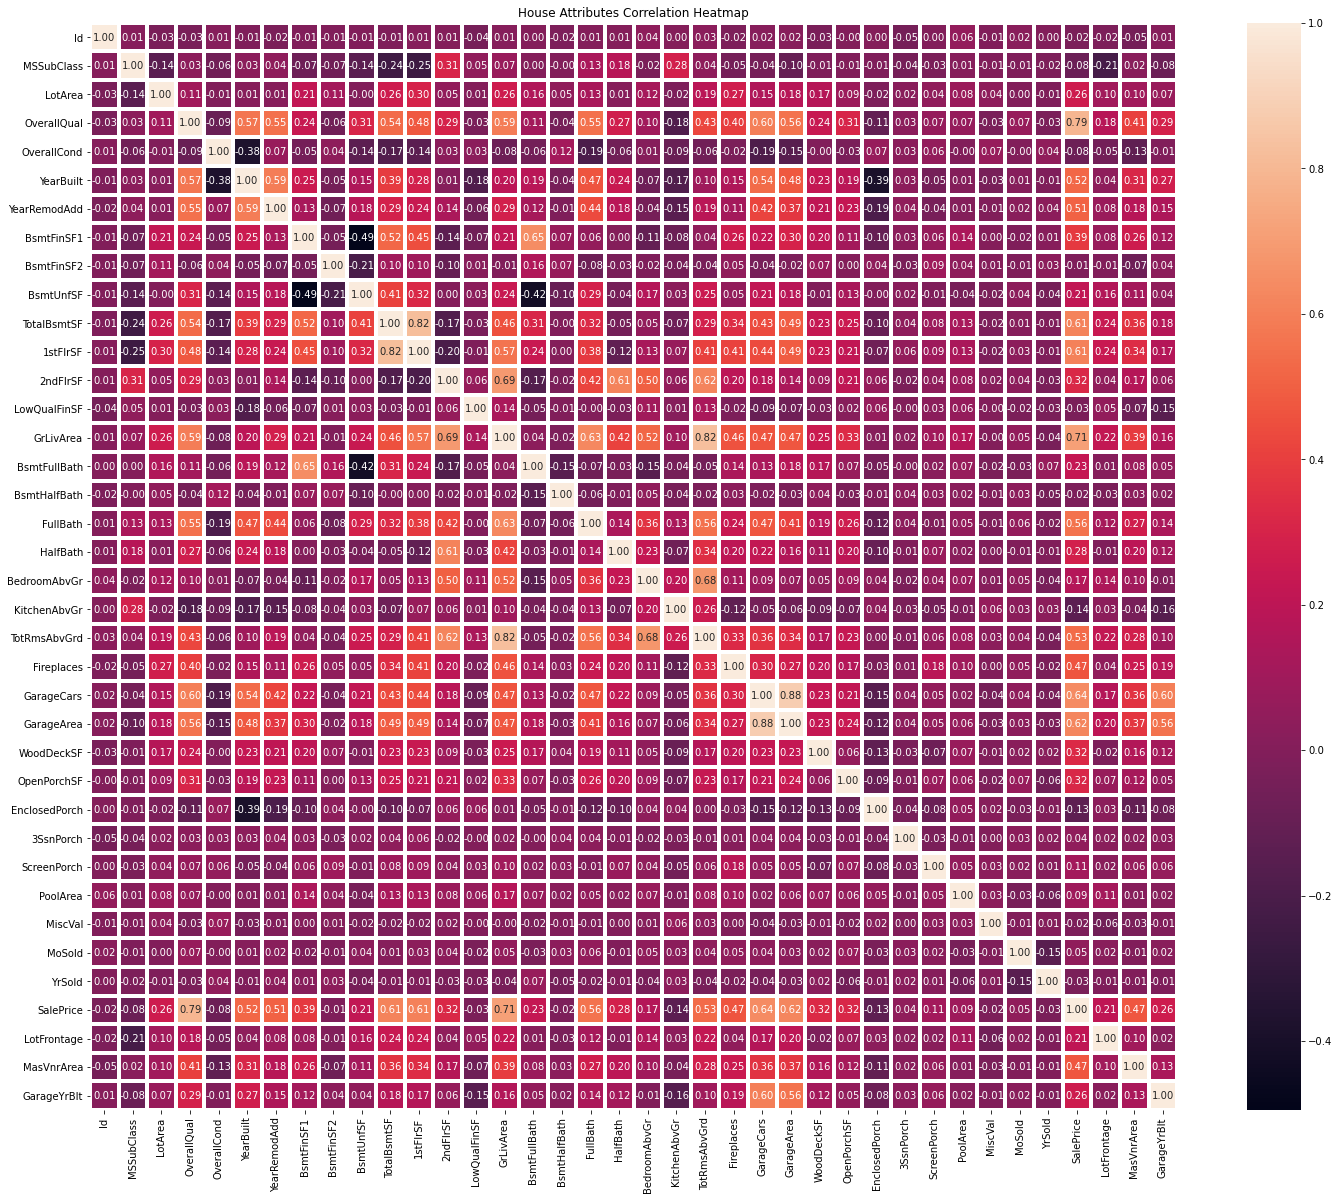

In [141]:
plt.figure(figsize=(25,20))
corr = dfnum.corr()
sns.heatmap(round(corr, 3), 
            annot=True, 
            fmt='.2f',
            square=True,
            linewidth=3,
            linecolor="white")
plt.title("House Attributes Correlation Heatmap")
plt.show()

In [197]:
num_columns=corr[corr['SalePrice']>=0.3].index

In [198]:
len(num_columns)

17

In [199]:
dfnum=dfnum[num_columns]
dfnum

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MasVnrArea
0,7,2003,2003,706,856,856,854,1710,2,8,0,2,548,0,61,208500,196.0
1,6,1976,1976,978,1262,1262,0,1262,2,6,1,2,460,298,0,181500,0.0
2,7,2001,2002,486,920,920,866,1786,2,6,1,2,608,0,42,223500,162.0
3,7,1915,1970,216,756,961,756,1717,1,7,1,3,642,0,35,140000,0.0
4,8,2000,2000,655,1145,1145,1053,2198,2,9,1,3,836,192,84,250000,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0,953,953,694,1647,2,7,1,2,460,0,40,175000,0.0
1456,6,1978,1988,790,1542,2073,0,2073,2,7,2,2,500,349,0,210000,119.0
1457,7,1941,2006,275,1152,1188,1152,2340,2,9,2,1,252,0,60,266500,0.0
1458,5,1950,1996,49,1078,1078,0,1078,1,5,0,1,240,366,0,142125,0.0


In [200]:
import plotly.express as px

In [201]:
fig=px.box(dfnum,x='SalePrice',title='Box plot for SalePrice')
fig.show()

### Pre-processing

#### Prediction only on the quantitatives variables

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [203]:
print(np.where(dfnum['SalePrice']>500000))

(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182], dtype=int64),)


In [204]:
dfnum.drop([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182],axis=0,inplace=True)

C:\Users\moi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [205]:
Normalisation=StandardScaler()

In [206]:
target=dfnum['SalePrice']
target=target.values.reshape(-1,1)

In [207]:
target=Normalisation.fit_transform(target)

In [208]:
train=dfnum.drop('SalePrice',axis=1)

In [209]:
train=Normalisation.fit_transform(train)

In [210]:
train

array([[ 0.67599651,  1.05795365,  0.88403055, ..., -0.75136864,
         0.2192973 ,  0.55366946],
       [-0.05818832,  0.16330139, -0.42383792, ...,  1.63904218,
        -0.70044414, -0.57641451],
       [ 0.67599651,  0.99168311,  0.83559098, ..., -0.75136864,
        -0.06717954,  0.35763449],
       ...,
       [ 0.67599651, -0.99643303,  1.02934927, ..., -0.75136864,
         0.20421957, -0.57641451],
       [-0.79237315, -0.69821561,  0.54495354, ...,  2.18450505,
        -0.70044414, -0.57641451],
       [-0.79237315, -0.20118658, -0.95667322, ...,  5.15246478,
         0.3248414 , -0.57641451]])

In [211]:
X_train,X_test,Y_train,Y_test=train_test_split(train,target,test_size=0.2,random_state=142)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [213]:
Lr=LinearRegression()

[ 232  280  329  378  427  476  525  573  622  671  720  769  818  866
  915  964 1013 1062 1111 1160]


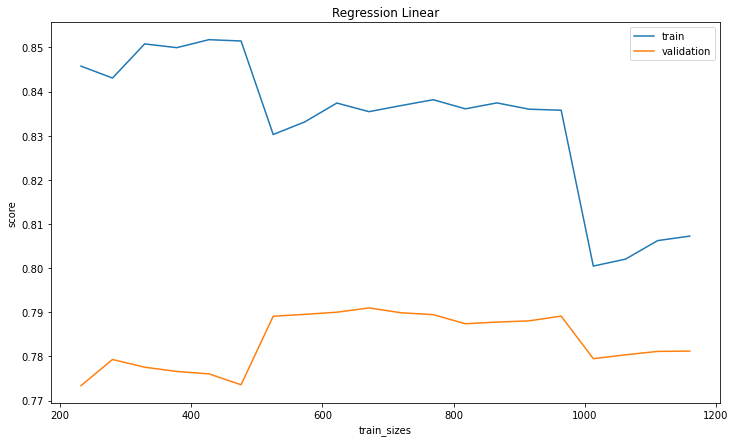

In [214]:
plt.figure(figsize=(12,7))
N,train_score, val_score=learning_curve(Lr,train,target,train_sizes=np.linspace(0.2,1.0,20),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title('Regression Linear')
plt.legend()

In [215]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [216]:
print(Lr.score(X_train,Y_train))

0.8106644005686107


In [217]:
y_pred=Lr.predict(X_test)
print(y_pred)

[[-5.84487578e-01]
 [ 5.76196553e-01]
 [-3.63461763e-02]
 [ 5.69026418e-01]
 [ 5.81550744e-01]
 [ 2.22221490e+00]
 [-3.90791231e-01]
 [ 1.20961961e+00]
 [ 9.92054395e-01]
 [ 2.88636093e-01]
 [ 1.90180184e-01]
 [ 1.54013883e+00]
 [ 5.52674718e-01]
 [-7.09906482e-01]
 [-3.40207634e-03]
 [-1.31679966e+00]
 [-1.02007899e+00]
 [-3.44806973e-01]
 [ 4.25066981e-01]
 [-8.02394352e-01]
 [ 3.52807318e-01]
 [-3.55580902e-02]
 [-1.87168039e+00]
 [ 8.04461983e-01]
 [ 1.15171748e+00]
 [-9.84658525e-01]
 [-7.30805043e-01]
 [-1.66454479e+00]
 [-1.49699989e+00]
 [ 3.09362546e-01]
 [-1.50493236e+00]
 [ 2.81125980e-01]
 [-8.17135290e-01]
 [ 2.32684566e-01]
 [-9.71815157e-01]
 [-2.89928801e-01]
 [ 5.37266456e-01]
 [ 8.60819328e-01]
 [-1.50447923e+00]
 [ 1.22162752e+00]
 [-1.12628480e-01]
 [-8.39266321e-01]
 [ 7.55632474e-02]
 [ 9.52837892e-01]
 [ 7.61401016e-01]
 [-2.31872888e+00]
 [-2.90804124e-01]
 [ 9.14350538e-01]
 [ 1.02466191e+00]
 [-1.41715615e+00]
 [ 4.68299517e-01]
 [-2.43639747e-01]
 [ 6.9506879

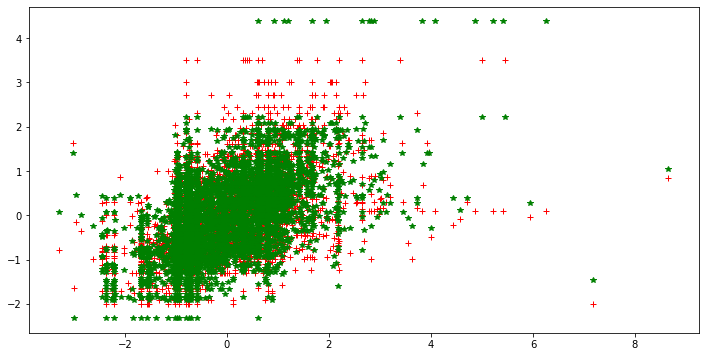

In [218]:
plt.figure(figsize=(12,6))
plt.plot(X_test,Y_test,'+',color='red')
plt.plot(X_test,y_pred,'*',color='green')

I see that the model don't predict good the outliers

In [219]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [222]:
print(r2_score(Y_test,y_pred))

0.7618957992524096


In [221]:
print('mean_square_error is:',mean_squared_error(Y_test,y_pred))
print('mean_square_error is:',mean_absolute_error(Y_test,y_pred))

mean_square_error is: 0.18426436835840437
mean_square_error is: 0.28373149423118116
